In [1]:
train_path = '../Data/ex2-churn/train.csv'
test_path = '../Data/ex2-churn/test.csv'

/kaggle/input/cis-ieee-unb-churn/df_train.csv
/kaggle/input/cis-ieee-unb-churn/df_test.csv


In [2]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
train.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,CLTV
count,5986.0,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,1.0,93521.009522,36.291181,-119.806998,32.302873,64.451938,4398.067658
std,0.0,1871.036207,2.460504,2.156244,24.555068,30.126750,1186.907923
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,2003.000000
25%,1.0,92091.000000,34.030915,-121.822224,9.000000,35.000000,3452.750000
50%,1.0,93554.500000,36.413825,-119.728910,29.000000,70.200000,4529.500000
75%,1.0,95359.500000,38.240769,-118.046695,55.000000,89.800000,5381.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.600000,6500.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1057 non-null   object 
 1   Count              1057 non-null   int64  
 2   Country            1057 non-null   object 
 3   State              1057 non-null   object 
 4   City               1057 non-null   object 
 5   Zip Code           1057 non-null   int64  
 6   Lat Long           1057 non-null   object 
 7   Latitude           1057 non-null   float64
 8   Longitude          1057 non-null   float64
 9   Gender             1057 non-null   object 
 10  Senior Citizen     1057 non-null   object 
 11  Partner            1057 non-null   object 
 12  Dependents         1057 non-null   object 
 13  Tenure Months      1057 non-null   int64  
 14  Phone Service      1057 non-null   object 
 15  Multiple Lines     1057 non-null   object 
 16  Internet Service   1057 

In [6]:
train.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV'],
      dtype='object')

In [7]:
def count_categorical_values(data):
    categoricals = data.select_dtypes(exclude=np.number)
    for i in categoricals:
        print(data[i].value_counts())
count_categorical_values(train)
    

CustomerID
7590-VHVEG    1
7254-IQWOZ    1
2636-SJDOU    1
0661-KQHNK    1
3197-ARFOY    1
             ..
8132-YPVBX    1
1614-JBEBI    1
8687-BAFGU    1
1513-XNPPH    1
7774-OJSXI    1
Name: count, Length: 5986, dtype: int64
Country
United States    5986
Name: count, dtype: int64
State
California    5986
Name: count, dtype: int64
City
Los Angeles      270
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Santa Clarita      1
Crockett           1
Jamestown          1
Squaw Valley       1
Leggett            1
Name: count, Length: 1129, dtype: int64
Lat Long
33.973616, -118.24902     5
34.422519, -118.420717    5
34.1528, -118.000482      5
34.002642, -118.287596    5
34.061918, -118.277939    5
                         ..
37.990118, -122.012188    1
37.897753, -122.279391    1
38.584505, -121.491956    1
38.049292, -122.228415    1
33.766004, -117.786763    1
Name: count, Length: 1652, dtype: int64
Gender
Male      3043
Female    2

In [8]:
train['Total Charges'] = pd.to_numeric(train['Total Charges'], errors='coerce')


In [9]:
test['Total Charges'] = pd.to_numeric(train['Total Charges'])

In [10]:
train['Total Charges'].isna().sum()

11

In [11]:

mean_value = train['Total Charges'].mean()


train['Total Charges'] = train['Total Charges'].fillna(mean_value)

train['Total Charges'].isna().sum()


0

In [12]:

mean_value = test['Total Charges'].mean()
test['Total Charges'] = test['Total Charges'].fillna(mean_value)
test['Total Charges'].isna().sum()

0

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

In [14]:
CustomerId = test['CustomerID']
train = train.drop(columns=['Country', 'State', 'CustomerID', 'Count'])
train.columns

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'CLTV'],
      dtype='object')

In [15]:
CustomerId.head()

0    2189-WWOEW
1    2446-ZKVAF
2    4986-MXSFP
3    5868-YWPDW
4    9412-GHEEC
Name: CustomerID, dtype: object

In [16]:
test = test.drop(columns=['CustomerID','Country', 'State', 'Count'])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               5986 non-null   object 
 1   Zip Code           5986 non-null   int64  
 2   Lat Long           5986 non-null   object 
 3   Latitude           5986 non-null   float64
 4   Longitude          5986 non-null   float64
 5   Gender             5986 non-null   object 
 6   Senior Citizen     5986 non-null   object 
 7   Partner            5986 non-null   object 
 8   Dependents         5986 non-null   object 
 9   Tenure Months      5986 non-null   int64  
 10  Phone Service      5986 non-null   object 
 11  Multiple Lines     5986 non-null   object 
 12  Internet Service   5986 non-null   object 
 13  Online Security    5986 non-null   object 
 14  Online Backup      5986 non-null   object 
 15  Device Protection  5986 non-null   object 
 16  Tech Support       5986 

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1057 non-null   object 
 1   Zip Code           1057 non-null   int64  
 2   Lat Long           1057 non-null   object 
 3   Latitude           1057 non-null   float64
 4   Longitude          1057 non-null   float64
 5   Gender             1057 non-null   object 
 6   Senior Citizen     1057 non-null   object 
 7   Partner            1057 non-null   object 
 8   Dependents         1057 non-null   object 
 9   Tenure Months      1057 non-null   int64  
 10  Phone Service      1057 non-null   object 
 11  Multiple Lines     1057 non-null   object 
 12  Internet Service   1057 non-null   object 
 13  Online Security    1057 non-null   object 
 14  Online Backup      1057 non-null   object 
 15  Device Protection  1057 non-null   object 
 16  Tech Support       1057 

In [19]:
train['City'].value_counts()

City
Los Angeles      270
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Santa Clarita      1
Crockett           1
Jamestown          1
Squaw Valley       1
Leggett            1
Name: count, Length: 1129, dtype: int64

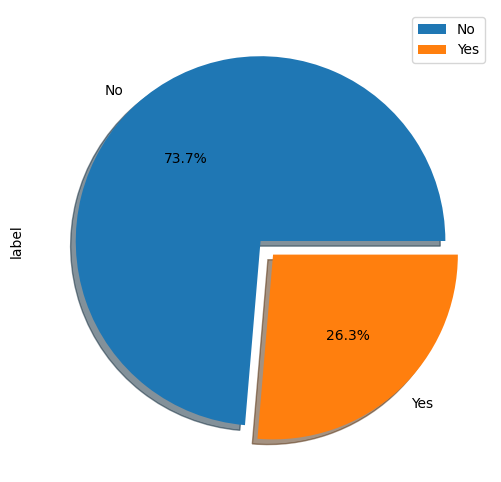

In [20]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
def show_bool_distrib(data, name_of_bool):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data[name_of_bool].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("label")
  plt.legend(["No", "Yes"])
  plt.show()


# Visualize the proportion of borrowers
show_bool_distrib(train, 'Churn Label')

In [21]:
train['Churn Label'] = train['Churn Label'] == 'Yes'
train['Churn Label'].head()

0    False
1    False
2    False
3    False
4     True
Name: Churn Label, dtype: bool

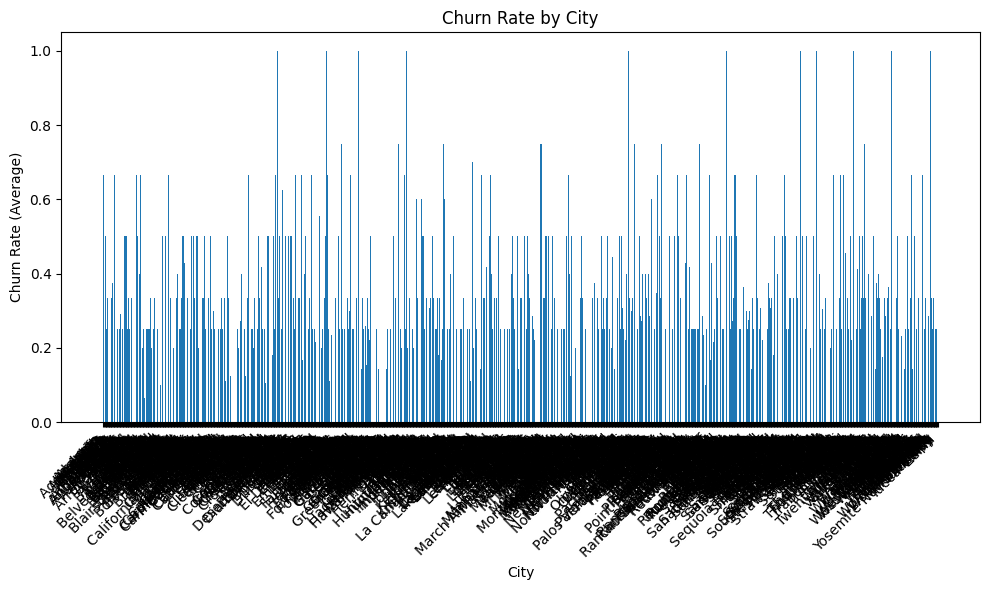

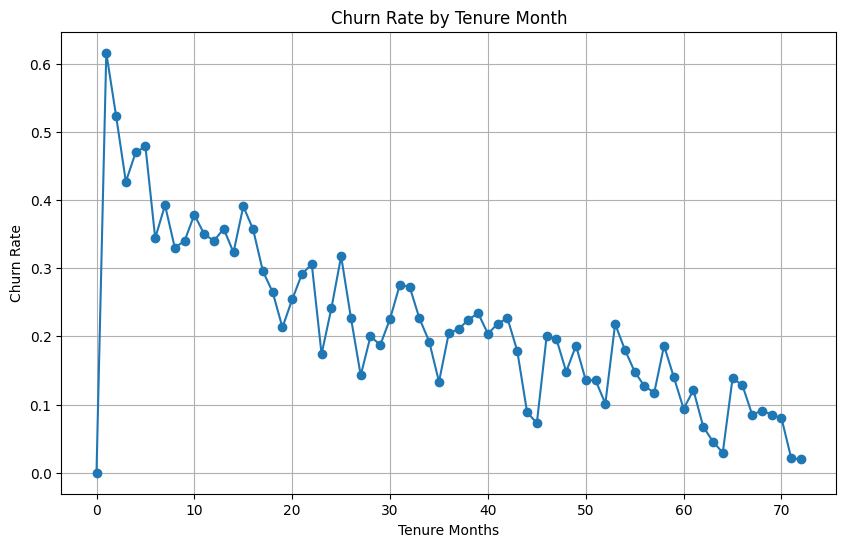

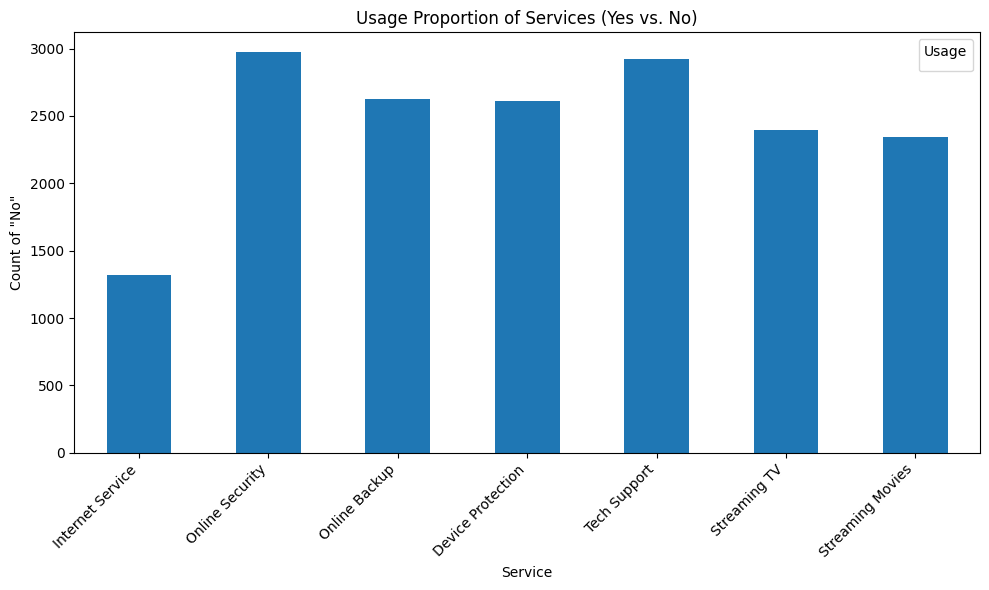

In [22]:
# Churn rate by city (bar chart)
churn_by_city = train.groupby('City')['Churn Label'].mean()
plt.figure(figsize=(10, 6))
plt.bar(churn_by_city.index, churn_by_city.values)
plt.xlabel('City')
plt.ylabel('Churn Rate (Average)')
plt.title('Churn Rate by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

churn_by_tenure = train.groupby('Tenure Months')['Churn Label'].mean()
# Churn rate by tenure month
plt.figure(figsize=(10, 6))
churn_by_tenure.plot(marker='o')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Month')
plt.grid(True)
plt.show()

# Service usage (bar chart)
service_usage = train[['Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']].apply(lambda x: (x == 'No').sum())

service_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Service')
plt.ylabel('Count of "No"')
plt.title('Usage Proportion of Services (Yes vs. No)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Usage')  # Add legend for clarity
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['City','Gender','Senior Citizen', 'Partner', 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup', 
 'Device Protection',
 'Tech Support', 
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(train[categorical_cols])
encoded_data = encoder.transform(train[categorical_cols])

In [24]:


# Check for NaN values in each column and get the count
na_counts = train[categorical_cols].isna().sum()

print("Number of NaN values in each column:")
print(na_counts)


Number of NaN values in each column:
City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
dtype: int64


In [25]:
train['Churn Label'] = train['Churn Label'].astype(int)

In [26]:
train['Churn Label'].head()

0    0
1    0
2    0
3    0
4    1
Name: Churn Label, dtype: int64

In [27]:
numeric_columns_test = test.select_dtypes(exclude=['object', 'string']).columns
numeric_columns = train.select_dtypes(exclude=['object', 'string']).columns.drop('Churn Label')
print(numeric_columns_test.shape)
numeric_columns.shape

(7,)


(7,)

In [28]:
print(numeric_columns)
print(numeric_columns_test)

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')
Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')


In [29]:

columns_to_check = ['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Check for NaN values in each column and get the count
na_counts = train[columns_to_check].isna().sum()

print("Number of NaN values in each column:")
print(na_counts)


Number of NaN values in each column:
Zip Code           0
Latitude           0
Longitude          0
Tenure Months      0
Monthly Charges    0
Total Charges      0
CLTV               0
dtype: int64


In [30]:
na_counts = test[columns_to_check].isna().sum()

print("Number of NaN values in each column:")
print(na_counts)

Number of NaN values in each column:
Zip Code           0
Latitude           0
Longitude          0
Tenure Months      0
Monthly Charges    0
Total Charges      0
CLTV               0
dtype: int64


In [31]:
numeric_data = train[numeric_columns].values
numeric_data_test = test[numeric_columns_test].values

In [32]:
numeric_data.shape

(5986, 7)

In [33]:
encoded_test = encoder.transform(test[categorical_cols])
encoded_test.shape

(1057, 1172)

In [34]:
y_train = train['Churn Label']
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Churn Label, dtype: int64

In [35]:
X = np.hstack([encoded_data, numeric_data])
X_test = np.hstack([encoded_test, numeric_data_test])

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [37]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier


# Assuming your data is in a pandas DataFrame named 'data'
# with features in 'X' and target variable in 'y'

model = DecisionTreeClassifier()
model.fit(X, y_train)

y_test = model.predict(X_test)




In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

nb_classifier = GaussianNB()
nb_classifier.fit(X, y_train)


GaussianNB()

# gaussian com PCA

In [39]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_pca, y_train)

GaussianNB()

In [40]:
svm_classifier = SVC(probability=True)  # Set probability=True if you need probability estimates
svm_classifier.fit(X, y_train)

SVC(probability=True)

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Define ensemble with voting
ensemble_classifier = VotingClassifier(
    estimators=[
        ('nb', nb_classifier),
        ('svm', svm_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'  # Use 'soft' for probability-based voting
)
ensemble_classifier.fit(X, y_train)


VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [43]:
# Predict and evaluate Naive Bayes
y_test = nb_classifier.predict(X_test) #best result

#nayve bayes com PCA
#y_test = nb_classifier.predict(X_test_pca)

# Predict and evaluate SVM
#y_test = svm_classifier.predict(X_test)


# Predict and evaluate Random Forest
#y_test = rf_classifier.predict(X_test)


# Predict and evaluate Ensemble Learning
#y_test = ensemble_classifier.predict(X_test)



In [44]:
y_test_series = pd.Series(y_test)
churn = y_test_series.map({0: 'No', 1: 'Yes'})

# Select only the columns we need to save
output_data = pd.concat([CustomerId, churn], axis=1)

output_data.columns = ['CustomerID', 'Churn Label']



In [45]:
# Write to CSV
output_data.to_csv('submission.csv', index=False)